In [31]:
import warnings
warnings.filterwarnings('ignore')

# Libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
data =pd.read_excel('wine_quality.xlsx')
df = pd.DataFrame(data)



# Exploratory Data Analysis (EDA)

In [34]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [36]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [37]:
df['pH'].unique()



array([3.  , 3.3 , 3.26, 3.19, 3.18, 3.22, 2.99, 3.14, 3.54, 2.98, 3.25,
       3.24, 3.33, 3.12, 3.17, 3.47, 3.05, 3.42, 3.45, 3.38, 3.1 , 3.2 ,
       3.37, 3.13, 3.21, 3.11, 3.16, 3.27, 3.36, 3.35, 3.34, 3.32, 3.31,
        nan, 3.09, 3.03, 3.02, 3.15, 3.69, 2.95, 2.94, 3.39, 3.04, 2.89,
       3.4 , 3.01, 3.63, 3.29, 3.23, 3.28, 3.06, 3.08, 2.87, 2.93, 3.44,
       3.5 , 3.48, 3.72, 3.53, 3.52, 2.96, 3.61, 3.43, 3.49, 3.51, 3.46,
       3.07, 2.97, 3.41, 3.64, 3.56, 2.86, 2.88, 2.85, 3.58, 3.55, 3.66,
       3.59, 2.74, 2.92, 3.82, 3.81, 3.65, 2.9 , 3.77, 2.91, 3.62, 3.74,
       2.8 , 3.6 , 2.72, 2.79, 3.57, 3.8 , 3.68, 2.77, 3.79, 3.7 , 2.84,
       3.76, 2.83, 3.75, 2.82, 3.67, 3.9 , 3.85, 3.71, 3.78, 4.01])

In [38]:
df.duplicated().sum()

1168

In [39]:
df = df.drop_duplicates()

In [40]:
import pandas as pd

# Load the dataset
data = pd.read_excel('wine_quality.xlsx')
df = pd.DataFrame(data)


In [41]:
# Fill missing values with the mean or median based on the distribution
for column in df.select_dtypes(include=[float, int]).columns:
    if df[column].skew() > 1 or df[column].skew() < -1:
        # If the distribution is skewed, use the median
        df[column].fillna(df[column].median(), inplace=True)
    else:
        # If the distribution is roughly normal, use the mean
        df[column].fillna(df[column].mean(), inplace=True)

In [42]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [43]:
# Binarize the quality variable (assuming binary classification for simplicity)
df['quality'] = (df['quality'] > 5).astype(int)  # Convert quality > 5 to 1, else 0

In [44]:
# Convert the categorical variable 'type' to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

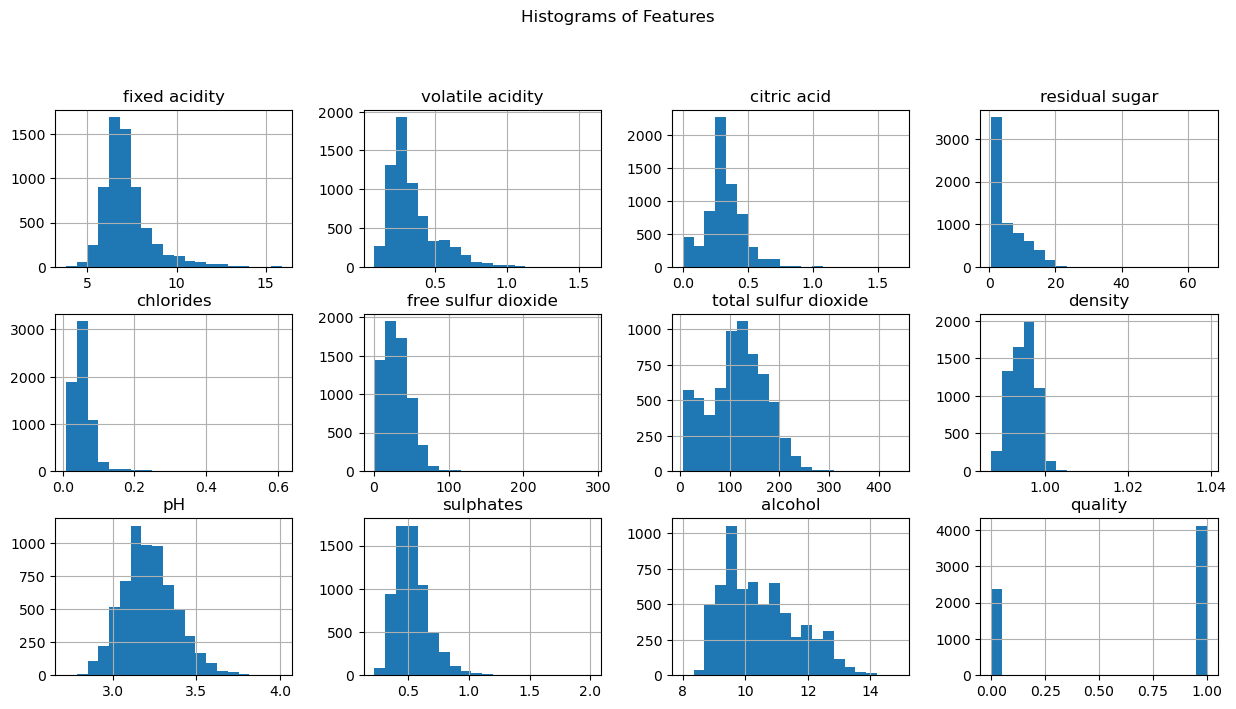

In [45]:
# Plot histogram for each feature
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Features')
plt.show()

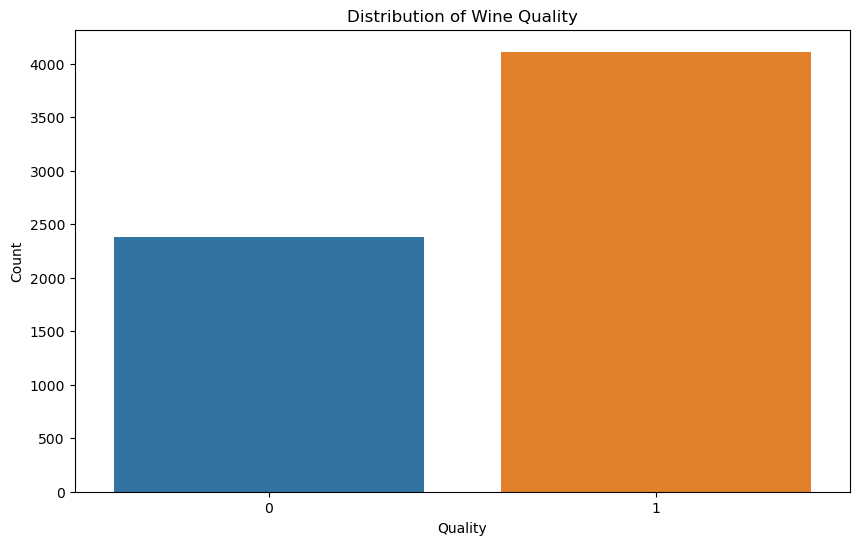

In [46]:
import seaborn as sns
# Analyze the distribution of the `quality` variable
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [47]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219872,0.323485,-0.112194,0.298249,-0.283164,-0.329421,0.458943,-0.251766,0.300198,-0.095561
volatile acidity,0.219872,1.000000,-0.377808,-0.196275,0.377141,-0.353016,-0.414857,0.271144,0.260453,0.225160,-0.038083
citric acid,0.323485,-0.377808,1.000000,0.142422,0.039248,0.133426,0.195148,0.096307,-0.328354,0.057673,-0.010431
residual sugar,-0.112194,-0.196275,0.142422,1.000000,-0.128891,0.402978,0.495545,0.552520,-0.266787,-0.185715,-0.359503
chlorides,0.298249,0.377141,0.039248,-0.128891,1.000000,-0.194973,-0.279565,0.362590,0.044879,0.395158,-0.256862
free sulfur dioxide,-0.283164,-0.353016,0.133426,0.402978,-0.194973,1.000000,0.720934,0.025717,-0.145116,-0.188470,-0.179838
total sulfur dioxide,-0.329421,-0.414857,0.195148,0.495545,-0.279565,0.720934,1.000000,0.032395,-0.237523,-0.275256,-0.265740
density,0.458943,0.271144,0.096307,0.552520,0.362590,0.025717,0.032395,1.000000,0.011913,0.259414,-0.686745
pH,-0.251766,0.260453,-0.328354,-0.266787,0.044879,-0.145116,-0.237523,0.011913,1.000000,0.190964,0.120939
sulphates,0.300198,0.225160,0.057673,-0.185715,0.395158,-0.188470,-0.275256,0.259414,0.190964,1.000000,-0.003261


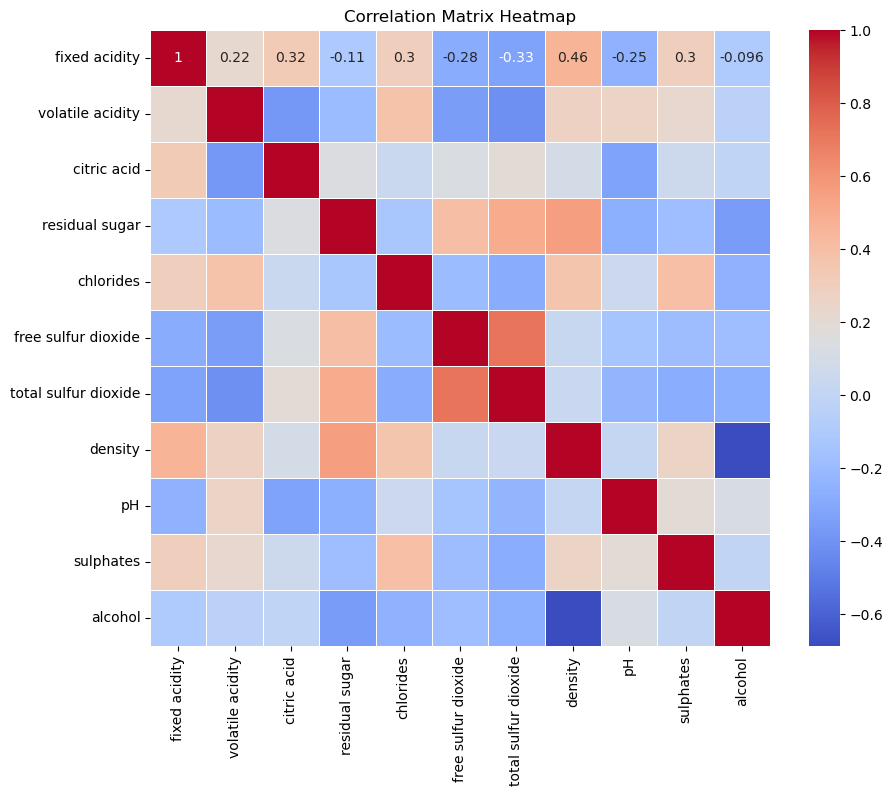

In [48]:
#Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Model Training and Evaluation

In [49]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_white'],
      dtype='object')

In [50]:
X.columns

Index(['type', 'fixed acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH'],
      dtype='object')

In [51]:
# Define the features and the target variable
X = df.drop(columns=['quality', 'alcohol', 'sulphates', 'citric acid', 'volatile acidity'])  # Exclude selected features and 'quality'
y = df['quality']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# baseline accuracy
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.63


In [54]:
# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [56]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6461538461538462

In [58]:
# Calculate the confusion matrix and accuracy score
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[108 360]
 [100 732]]


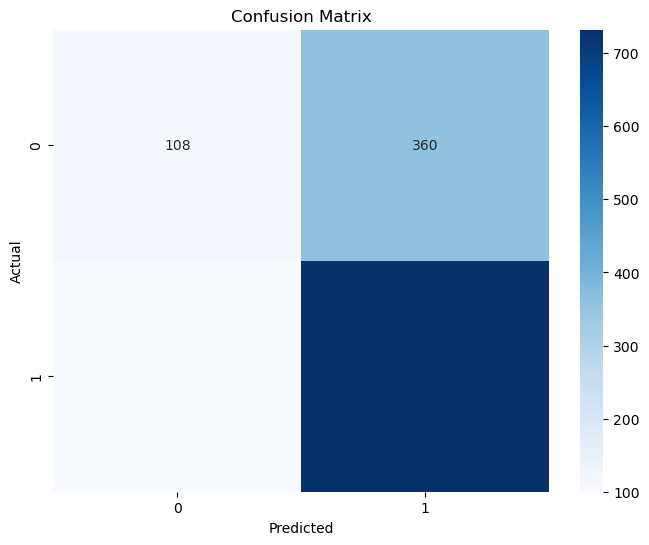

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()


In [60]:
# classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.52      0.23      0.32       468
           1       0.67      0.88      0.76       832

    accuracy                           0.65      1300
   macro avg       0.59      0.56      0.54      1300
weighted avg       0.62      0.65      0.60      1300



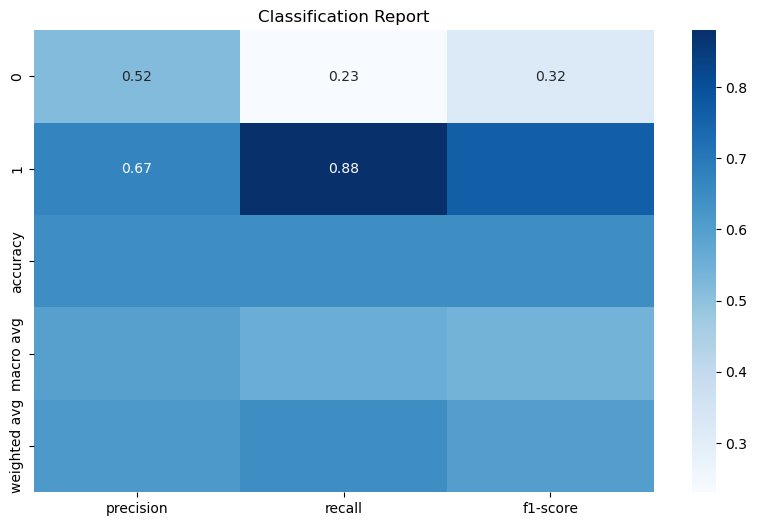

In [61]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).iloc[:-1, :].T
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.savefig("classification_report.png")
plt.show()


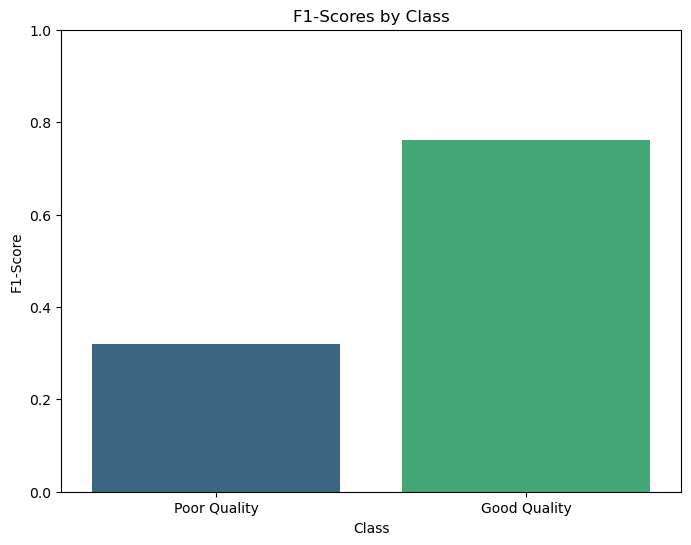

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming class_report is already defined
class_labels = ['Poor Quality', 'Good Quality']
f1_scores = [class_report['0']['f1-score'], class_report['1']['f1-score']]
plt.figure(figsize=(8, 6))
sns.barplot(x=class_labels, y=f1_scores, palette='viridis')
plt.title('F1-Scores by Class')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.savefig("f1_scores.png")
plt.show()


In [63]:
import pickle
# Save the trained model to a pickle file
with open('wine_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [64]:
import numpy as np
import pickle
import streamlit as st

# Load the trained model
with open('wine_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Streamlit app
st.title('Wine Quality Prediction')

# Input fields for each feature
fixed_acidity = st.number_input('Fixed Acidity', min_value=0.0, max_value=20.0, value=7.0)
volatile_acidity = st.number_input('Volatile Acidity', min_value=0.0, max_value=2.0, value=0.3)
citric_acid = st.number_input('Citric Acid', min_value=0.0, max_value=1.0, value=0.3)
chlorides = st.number_input('Chlorides', min_value=0.0, max_value=1.0, value=0.04)
free_sulfur_dioxide = st.number_input('Free Sulfur Dioxide', min_value=0, max_value=100, value=30)
total_sulfur_dioxide = st.number_input('Total Sulfur Dioxide', min_value=0, max_value=300, value=100)
pH = st.number_input('pH', min_value=0.0, max_value=14.0, value=3.3)
type_white = st.selectbox('Type', options=[0, 1], format_func=lambda x: 'White' if x == 1 else 'Red')

# Define a function to make predictions
def predict_quality():
    # Prepare the feature array for prediction
    features = np.array([[fixed_acidity, volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, pH, type_white]])
    
    # Make prediction
    prediction = loaded_model.predict(features)
    
    # Display the result
    if prediction == 1:
        st.success('The wine is predicted to be of good quality!')
    else:
        st.warning('The wine is predicted to be of poor quality.')

# Button to make predictions
if st.button('Predict Quality'):
    predict_quality()


2024-07-18 13:33:11.861 
  command:

    streamlit run C:\Users\NGUZO\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-18 13:33:11.868 Session state does not function when running a script without `streamlit run`
